<center>

# Airbnb Dataset | Data Cleaning and Preprocessing
  
#### Data Cleaning and Preprocessing of Airbnb Reviews: Insights from Inside Airbnb Datasets

</center>

### Project Objective
___
The primary objective of this project is to __clean, preprocess, and integrate__ Airbnb listings and reviews datasets from Inside Airbnb to enable meaningful analysis. 

This includes preparing the data for subsequent tasks such as sentiment analysis, host performance evaluation, and market trend analysis. 

By addressing missing values, inconsistencies, and data quality issues, the project aims to provide a reliable and structured dataset for actionable insights.

<br>

### Datasets
___
Source: Inside Airbnb (https://insideairbnb.com/get-the-data/)

The project will use two main datasets:

* __Listings Dataset__ – Contains information about Airbnb properties, including:
    - Listing ID
    - Host ID and details
    - Property type
    - Location (latitude, longitude, neighborhood)
    - Price, availability, minimum stay
    - Ratings and review scores    
<br>
* __Reviews Dataset__ – Contains historical reviews for listings:
    - Review ID
    - Listing ID
    - Reviewer ID and name
    - Date of review
    - Review text

Timeframe: The latest available dataset for the selected city (e.g., New York, London, etc.)

<br>

### Project Scope
___
The scope of this project includes the following tasks:

__A. Data Cleaning__

* __Handling Missing Values:__ Identify and impute or remove missing values in critical columns (e.g., price, review text, listing ID).
* __Removing Duplicates:__ Ensure unique entries for listings and reviews.
* __Data Type Corrections:__ Convert columns to appropriate types (e.g., dates to datetime, prices to numeric).
* __Consistency Checks:__ Standardize categorical variables (e.g., property types, neighborhoods).

__B. Data Preprocessing__

* __Text Preprocessing__ (for reviews):
    * Remove punctuation, special characters, and stopwords.
    * Normalize text (lowercasing, stemming/lemmatization).
    * Handle emojis or special symbols if required.
<br>
* __Date Processing__:
    * Convert review dates to datetime objects.
    * Extract features like month, year, or day of the week for temporal analysis.
<br>
* __Price Normalization__:
    * Remove currency symbols, commas, and convert to float.
<br>
* __Feature Engineering__:
    * Average rating per host or listing.
    * Review length (number of words/characters).
    * Sentiment score of reviews using NLP techniques.
<br>
* __Merging Datasets__:
    * Combine listings and reviews datasets on listing_id to create an enriched dataset for analysis.

__C. Data Quality Assurance__

* Identify outliers (e.g., extremely high prices, unrealistic review counts).
* Validate that merged datasets maintain integrity (no mismatched or missing IDs).

<br>

### Tools and Technologies
___
__Programming Language:__ Python

__Libraries:__

* Data manipulation: pandas, numpy

* Text preprocessing: nltk, spaCy, re

* Visualization and EDA: matplotlib, seaborn, plotly

* Optional: Jupyter Notebook or Google Colab for interactive workflow

<br>

### Expected Outcomes
___
A __cleaned and preprocessed__ dataset ready for analysis and modeling.

Enhanced understanding of:

* Listing distribution across neighborhoods and property types

* Review patterns and trends

* Host performance and guest satisfaction

* Textual insights from reviews, including sentiment and keyword trends.

* Documentation of data cleaning steps and methodology for reproducibility.

<br>

### Extensions (Optional Future Work)
___
Once preprocessing is complete, the dataset can be used for: 

* Sentiment analysis on review text.

* Predictive modeling (e.g., predicting listing ratings or price).

* Market analysis and trends over time.

* Visualization dashboards for Airbnb trends in the selected city. 

<br>

<center>
    
### Project Implementation
___
</center>


__Import Libraries__

All the libraries below are essential for the cleaning, processing and visualizing the datasets.

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
# nltk.download('stopwords')
# nltk.download('wordnet')

__Note:__ 'stopwords' and 'wordnet library are required. Install them once if they are not installed by removing '#' and running the libraries again.

__Load Dataset__

In [2]:
listings=pd.read_csv('listings.csv.gz', compression='gzip')
reviews=pd.read_csv('reviews.csv.gz', compression='gzip')

Overview them:

__Listings__

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,...,4.52,4.36,4.38,NaN,t,11,11,0,0,0.43
3,264779,https://www.airbnb.com/rooms/264779,20250610032232,2025-06-11,city scrape,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,1389063,...,4.61,4.50,4.47,NaN,t,11,11,0,0,0.30
4,264780,https://www.airbnb.com/rooms/264780,20250610032232,2025-06-11,city scrape,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,1389063,...,4.74,4.37,4.59,NaN,t,11,11,0,0,0.35


Observe for missing values, outliers:

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [5]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.665100e+04,9.665100e+04,9.665100e+04,96613.000000,96613.000000,0.0,96651.000000,96651.000000,96651.000000,62730.000000,...,71443.000000,71466.000000,71442.000000,71442.000000,0.0,96651.000000,96651.000000,96651.000000,96651.000000,71487.000000
mean,6.526020e+17,2.025061e+13,2.091790e+08,46.263577,76.334945,NaN,51.509818,-0.127087,3.316520,1.358018,...,4.792937,4.816368,4.733591,4.623804,NaN,16.389370,14.170831,2.164716,0.025763,0.958877
std,5.708808e+17,3.301970e+01,2.141266e+08,357.645418,561.614957,NaN,0.048945,0.100853,2.073674,0.725580,...,0.431668,0.423297,0.408804,0.506245,NaN,53.299577,52.845630,8.543681,0.626042,1.282595
min,1.391300e+04,2.025061e+13,2.594000e+03,1.000000,1.000000,NaN,51.295937,-0.496760,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.955518e+07,2.025061e+13,2.673176e+07,1.000000,1.000000,NaN,51.484240,-0.189060,2.000000,1.000000,...,4.760000,4.800000,4.650000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.150000
50%,8.123206e+17,2.025061e+13,1.128684e+08,2.000000,3.000000,NaN,51.513791,-0.126990,2.000000,1.000000,...,4.930000,4.970000,4.850000,4.750000,NaN,2.000000,1.000000,0.000000,0.000000,0.500000
75%,1.197378e+18,2.025061e+13,4.063762e+08,9.000000,14.000000,NaN,51.539099,-0.067880,4.000000,1.500000,...,5.000000,5.000000,5.000000,4.950000,NaN,8.000000,5.000000,1.000000,0.000000,1.230000
max,1.439673e+18,2.025061e+13,7.001298e+08,4884.000000,8723.000000,NaN,51.682630,0.278960,16.000000,26.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,495.000000,495.000000,116.000000,25.000000,38.410000


__Reviews__

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019207 entries, 0 to 2019206
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 92.4+ MB


In [8]:
reviews.describe()

,listing_id,id,reviewer_id
count,2.019207e+06,2.019207e+06,2.019207e+06
mean,3.209347e+17,7.191609e+17,1.900836e+08
std,4.627972e+17,5.309132e+17,1.811946e+08
min,1.391300e+04,2.103200e+04,4.400000e+01
25%,1.514460e+07,5.340252e+08,3.926997e+07
50%,3.560684e+07,8.738128e+17,1.237987e+08
75%,7.578975e+17,1.194124e+18,3.057387e+08
max,1.439277e+18,1.442785e+18,7.003099e+08


In a quick observation we can see that:
* Listings dataset contains few missing values on specific columns, while Reviews doesn't seem to have. However we are going to observe missing values more detailed in the cleaning process. 

* Also Listings illustrate outliers in some collumns, but again Reviews are showing absent to low outliers.

### Data Cleaning
___

In this part we are implementing the Data Cleaning operation through each dataset at a time.

#### Listings Dataset

In [9]:
listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               25164
Length: 79, dtype: int64

__Remove Duplicates__

In [10]:
listings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
96646    False
96647    False
96648    False
96649    False
96650    False
Length: 96651, dtype: bool

In [11]:
listings = listings.drop_duplicates(subset=['id'])

__Missing Values__

In [12]:
# fill missing review scores with median
listings['review_scores_rating'].isnull().sum()

np.int64(25164)

In [13]:
listings['review_scores_rating']=listings['review_scores_rating'].fillna(listings['review_scores_rating'].median())

In [14]:
# Convert price to numeric
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Standardize categorical columns
listings['property_type'] = listings['property_type'].str.lower().str.strip()
listings['neighbourhood'] = listings['neighbourhood'].str.title().str.strip()

Summary of the above:

* Remove duplicates: for avoiding counting the same listing multiple times.

* Handle missing values: missing review scores could break analysis or models, however by using median preserves overall trends without biasing extreme values.

* Price conversion: we know that Airbnb prices are often strings with $ and commas. Converting to numeric allows aggregation and analysis.

* Standardize categorical columns: Fix inconsistencies in capitalization and spacing (e.g., "Entire home/apt" vs "entire Home/Apt") to avoid misalignments.

#### Reviews Dataset

In [15]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      2
comments         200
dtype: int64

__Remove Duplicates__

In [16]:
reviews.duplicated().sum()

np.int64(0)

In [17]:
reviews = reviews.drop_duplicates(subset='id')

__Missing Values__

In [18]:
reviews = reviews.dropna(subset=['comments'])

__Date Column Convertion__

In [19]:
reviews['date'] = pd.to_datetime(reviews['date'])

Above structure was developed for:

* Remove duplicates: to avoid counting the same review twice.

* Date conversion: makes temporal analysis (trends over time) possible.

* Drop missing comments: Empty review texts don’t contribute to sentiment analysis or textual features.

<br>

### Text Preprocessing
___

In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)     # remove any special characters and numbers

    words = [word for word in text.split() if word not in stop_words]   # removing process of any stopwords

    # lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

reviews['cleaned_comments'] = reviews['comments'].apply(clean_text)

In [21]:
pd.set_option('display.max_colwidth', None)

reviews['cleaned_comments'].head()

0    girlfriend hadnt known alina took leap faith rent flat alina couldnt nicer flat comfortable homey sunny quiet night diverse neighborhood rock full excellent eatery varying ethnicity good supermarket etc etc place minute walk finsbury park tube stop also several bus ply stroud green road piccadilly victoria tube line serve finsbury park dependable come frequently caveat unwilling take minute commute downtown london attraction money object prefer stay downtown anyone else love experience living real untouristy neighborhood dealing generous warmhearted woman im happy call new friend
1                                                                                                                                                                                                                                                                                                                                                                                                                       

<br>
Text Processing was developed for:

* Lowercase: Makes words uniform (e.g., "Great" and "great" are treated the same).

* Remove special characters & numbers: Focus only on words.

* Remove stopwords: Common words like "the", "is", "and" don’t carry meaning.

* Lemmatization: Reduces words to their root forms (“cleaned” → “clean”) for consistency in NLP tasks.

Purpose: Makes review text analysis (sentiment, keyword extraction) more reliable, for further investigations.

<br>

### Feature Engineering
___

__Reviews Length__

In [22]:
reviews['review_length'] = reviews['cleaned_comments'].apply(lambda x: len(x.split()))

In [23]:
reviews['review_length'].head()

0    84
1    19
2    36
3    41
4    12
Name: review_length, dtype: int64

__Average Rating per Listing__

In [24]:
listing_avg_rating = reviews.groupby('listing_id')['review_length'].mean().reset_index()
listing_avg_rating.rename(columns={'review_length': 'avg_review_length'}, inplace=True)

__Merge Average Review Length with Listings__

In [25]:
listings = listings.merge(listing_avg_rating, left_on='id', right_on='listing_id', how='left')

Feature Engineering structure:

* Review length: Can indicate review detail or sentiment intensity.

* Average review length per listing: Aggregates reviewer behavior at listing level.

* Merge with listings: Enrich listings dataset for analysis and modeling.

<br> 

### Merge Both Datasets
___

In [26]:
airbnb_data=reviews.merge(listings, left_on='listing_id', right_on='id', how='left')

In [27]:
pd.reset_option('display.max_colwidth')
airbnb_data.head()

,listing_id_x,id_x,date,reviewer_id,reviewer_name,comments,cleaned_comments,review_length,id_y,listing_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id_y,avg_review_length
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,girlfriend hadnt known alina took leap faith r...,84,13913,https://www.airbnb.com/rooms/13913,...,4.77,NaN,f,3,2,1,0,0.3,13913.0,25.111111
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,alina really good host flat clean tidy really ...,19,13913,https://www.airbnb.com/rooms/13913,...,4.77,NaN,f,3,2,1,0,0.3,13913.0,25.111111
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,alina amazing host made feel right home like h...,36,13913,https://www.airbnb.com/rooms/13913,...,4.77,NaN,f,3,2,1,0,0.3,13913.0,25.111111
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",alinas place nice room big clean bed huge alin...,41,13913,https://www.airbnb.com/rooms/13913,...,4.77,NaN,f,3,2,1,0,0.3,13913.0,25.111111
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",nice location islington area good short busine...,12,13913,https://www.airbnb.com/rooms/13913,...,4.77,NaN,f,3,2,1,0,0.3,13913.0,25.111111


In [28]:
airbnb_data.describe()

,listing_id_x,id_x,date,reviewer_id,review_length,id_y,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id_y,avg_review_length
count,2.019007e+06,2.019007e+06,2019007,2.019007e+06,2.019007e+06,2.019007e+06,2.019007e+06,2.019007e+06,2.017888e+06,2.017888e+06,...,2.018962e+06,2.018962e+06,0.0,2.019007e+06,2.019007e+06,2.019007e+06,2.019007e+06,2.019007e+06,2.019007e+06,2.019007e+06
mean,3.209268e+17,7.191484e+17,2022-03-04 00:20:15.201730816,1.900731e+08,2.496535e+01,3.209268e+17,2.025061e+13,1.437229e+08,1.288485e+01,2.278532e+01,...,4.775205e+00,4.695305e+00,NaN,9.811557e+00,7.087556e+00,2.676590e+00,2.848925e-02,2.306893e+00,3.209268e+17,2.496535e+01
min,1.391300e+04,2.103200e+04,2009-12-21 00:00:00,4.400000e+01,0.000000e+00,1.391300e+04,2.025061e+13,6.774000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.391300e+04,0.000000e+00
25%,1.514460e+07,5.340119e+08,2019-09-22 00:00:00,3.926607e+07,9.000000e+00,1.514460e+07,2.025061e+13,1.500658e+07,1.000000e+00,2.000000e+00,...,4.690000e+00,4.590000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e-01,1.514460e+07,2.028481e+01
50%,3.560417e+07,8.738103e+17,2023-04-20 00:00:00,1.237893e+08,1.800000e+01,3.560417e+07,2.025061e+13,6.241120e+07,3.000000e+00,4.000000e+00,...,4.820000e+00,4.740000e+00,NaN,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.610000e+00,3.560417e+07,2.432403e+01
75%,7.578975e+17,1.194123e+18,2024-07-05 00:00:00,3.057060e+08,3.300000e+01,7.578975e+17,2.025061e+13,2.205213e+08,9.000000e+00,1.300000e+01,...,4.910000e+00,4.850000e+00,NaN,8.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,3.150000e+00,7.578975e+17,2.873077e+01
max,1.439277e+18,1.442785e+18,2025-06-13 00:00:00,7.003099e+08,8.080000e+02,1.439277e+18,2.025061e+13,6.993027e+08,4.884000e+03,8.723000e+03,...,5.000000e+00,5.000000e+00,NaN,4.950000e+02,4.950000e+02,1.160000e+02,2.500000e+01,3.841000e+01,1.439277e+18,3.310000e+02
std,4.627957e+17,5.309174e+17,NaN,1.811898e+08,2.425752e+01,4.627957e+17,3.536485e+02,1.719249e+08,4.482367e+01,1.241011e+02,...,1.986260e-01,2.287008e-01,NaN,2.360081e+01,2.220274e+01,8.220333e+00,5.184557e-01,2.567385e+00,4.627957e+17,7.333091e+00


__Missing Data__

In [29]:
airbnb_data.isnull().sum()

listing_id_x                                    0
id_x                                            0
date                                            0
reviewer_id                                     0
reviewer_name                                   2
                                               ..
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
listing_id_y                                    0
avg_review_length                               0
Length: 89, dtype: int64

__Drop Duplicates__

In [30]:
airbnb_data = airbnb_data.drop(columns=['id_y'])
airbnb_data.rename(columns={'id_x':'review_id'}, inplace=True)

In [31]:
airbnb_data.shape

(2019007, 88)

__Quick check on price Distribution__

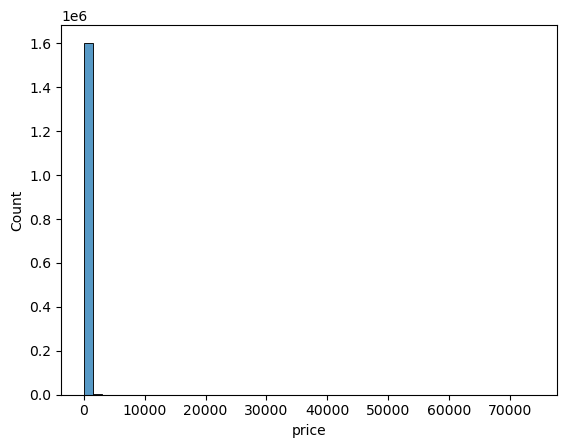

In [32]:
sns.histplot(airbnb_data['price'], bins=50)
plt.show()

### Final Clean Airbnb Dataset

In [33]:
airbnb_data

,listing_id_x,review_id,date,reviewer_id,reviewer_name,comments,cleaned_comments,review_length,listing_url,scrape_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id_y,avg_review_length
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,girlfriend hadnt known alina took leap faith r...,84,https://www.airbnb.com/rooms/13913,20250610032232,...,4.77,NaN,f,3,2,1,0,0.3,1.391300e+04,25.111111
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,alina really good host flat clean tidy really ...,19,https://www.airbnb.com/rooms/13913,20250610032232,...,4.77,NaN,f,3,2,1,0,0.3,1.391300e+04,25.111111
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,alina amazing host made feel right home like h...,36,https://www.airbnb.com/rooms/13913,20250610032232,...,4.77,NaN,f,3,2,1,0,0.3,1.391300e+04,25.111111
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",alinas place nice room big clean bed huge alin...,41,https://www.airbnb.com/rooms/13913,20250610032232,...,4.77,NaN,f,3,2,1,0,0.3,1.391300e+04,25.111111
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",nice location islington area good short busine...,12,https://www.airbnb.com/rooms/13913,20250610032232,...,4.77,NaN,f,3,2,1,0,0.3,1.391300e+04,25.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019002,1437468884839098057,1441262288700455863,2025-06-11,557961852,Sara,"everything perfect like always , thanks!",everything perfect like always thanks,5,https://www.airbnb.com/rooms/1437468884839098057,20250610032232,...,5.00,NaN,f,70,0,70,0,1.0,1.437469e+18,5.000000
2019003,1437514251963256298,1440494806868282460,2025-06-10,162881310,Codain,lindsay is the greatest host with superb house...,lindsay greatest host superb house quiet town ...,12,https://www.airbnb.com/rooms/1437514251963256298,20250610032232,...,5.00,NaN,f,2,1,1,0,1.0,1.437514e+18,12.000000
2019004,1437534500298926176,1439044249999642041,2025-06-08,149863980,Kate,Big place and lovely pillows! Needs to have th...,big place lovely pillow need door number door,8,https://www.airbnb.com/rooms/1437534500298926176,20250610032232,...,5.00,NaN,f,4,4,0,0,1.0,1.437535e+18,8.000000
2019005,1437665503529603793,1440577853348879880,2025-06-10,43976314,Sheila,"What a place, I’m so happy this is back on Air...",place im happy back airbnb view balcony world ...,40,https://www.airbnb.com/rooms/1437665503529603793,20250610032232,...,5.00,NaN,f,2,2,0,0,1.0,1.437666e+18,40.000000


In [34]:
airbnb_data.isnull().sum()

listing_id_x                                    0
review_id                                       0
date                                            0
reviewer_id                                     0
reviewer_name                                   2
                                               ..
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
listing_id_y                                    0
avg_review_length                               0
Length: 88, dtype: int64

In [35]:
airbnb_data.columns[airbnb_data.isnull().any()]

Index(['reviewer_name', 'description', 'neighborhood_overview', 'picture_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'calendar_updated', 'has_availability',
       'estimated_revenue_l365d', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license'],
      dtype='object')

<br>
When we run the new merged dataset is expected to illustrate missing values, even though both dataset separatly are totaly cleaned, so while the individual datasets were cleaned, the merged dataset is not yet fully cleaned, because merging introduces new missing values by design. 

> What can we do now?
<br>

__Post-Merge Data Cleaning__


In [36]:
airbnb_data.isnull().sum().sort_values(ascending=False)

calendar_updated                                2019007
license                                         2019007
neighbourhood_group_cleansed                    2019007
host_neighbourhood                               785350
host_about                                       705515
                                                 ...   
calculated_host_listings_count_private_rooms          0
calculated_host_listings_count_shared_rooms           0
reviews_per_month                                     0
listing_id_y                                          0
avg_review_length                                     0
Length: 88, dtype: int64

<br>
For avoiding any misinformation and for making our dataset more well structure we rename and drop the listings x, y:

In [37]:
# Drop the duplicate listing_id_y column
if 'listing_id_y' in airbnb_data.columns:
    airbnb_data = airbnb_data.drop(columns=['listing_id_y'])

# Rename listing_id_x → listing_id
if 'listing_id_x' in airbnb_data.columns:
    airbnb_data = airbnb_data.rename(columns={'listing_id_x': 'listing_id'})

<br>
We remove columns that are not useful, such as:

In [38]:
columns_to_drop = [
    'reviewer_name', 'description', 'neighborhood_overview', 'picture_url',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time',
    'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url',
    'host_picture_url', 'host_verifications', 'host_about', 'host_has_profile_pic',
    'host_identity_verified', 'calendar_last_scraped', 'listing_url',
    'calendar_updated', 'license', 'neighbourhood_group_cleansed',
    'host_neighbourhood', 'estimated_revenue_l365d'
]

airbnb_data = airbnb_data.drop(columns=columns_to_drop, errors='ignore')

This columns:

* Are not needed for modeling or sentiment analysis

* Introduce unnecessary missing values

* Do not improve predictive or exploratory value

__Important Columns with missing values__

In [39]:
# Fill missing neighborhoods
airbnb_data['neighbourhood'] = airbnb_data['neighbourhood'].fillna("Unknown")

# Fill price by neighborhood median
airbnb_data['price'] = airbnb_data.groupby('neighbourhood')['price'].transform(
    lambda x: x.fillna(x.median())
)

# Fill review scores with median
rating_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]
for col in rating_cols:
    airbnb_data[col] = airbnb_data[col].fillna(airbnb_data[col].median())

# Listings with no reviews, set review-derived metrics to 0
airbnb_data['avg_review_length'] = airbnb_data['avg_review_length'].fillna(0)
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)

# Bathrooms, bedrooms, beds, etc. → median
for col in ['bathrooms', 'bedrooms', 'beds']:
    airbnb_data[col] = airbnb_data[col].fillna(airbnb_data[col].median())

In [40]:
# Check columns and missing values
print(airbnb_data.columns)
print(airbnb_data.isnull().sum().sort_values(ascending=False))

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'comments',
       'cleaned_comments', 'review_length', 'scrape_id', 'last_scraped',
       'source', 'name', 'host_id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'first_review', 'last_review', 'review_scores_ratin

For handling the external missing values and not droping them we:

| Column                      | Missing Count | Notes                                                                      |
| --------------------------- | ------------- | -------------------------------------------------------------------------- |
| `host_is_superhost`         | 56,839        | Optional host info — can fill with False/Unknown                           |
| `has_availability`          | 14,610        | Can fill with default Yes/No or True/False                                 |
| `bathrooms_text`            | 1,487         | Mostly duplicates info in `bathrooms` — can drop or keep for text analysis |
| `host_total_listings_count` | 1,119         | Small missing, fill with median                                            |
| `host_listings_count`       | 1,119         | Same as above                                                              |
| All other columns           | 0             | Clean                                                                      |


In [41]:
# Fill host-related missing fields
airbnb_data['host_is_superhost'] = airbnb_data['host_is_superhost'].fillna(False)

# Fill availability missing values
airbnb_data['has_availability'] = airbnb_data['has_availability'].fillna(True)

# Fill numeric host listing counts
for col in ['host_listings_count', 'host_total_listings_count']:
    airbnb_data[col] = airbnb_data[col].fillna(airbnb_data[col].median())

# drop since not essential
airbnb_data = airbnb_data.drop(columns=['bathrooms_text'], errors='ignore')

In [42]:
# Check remaining missing values
airbnb_data.isnull().sum().sort_values(ascending=False)

listing_id                                      0
review_id                                       0
date                                            0
reviewer_id                                     0
comments                                        0
                                               ..
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
avg_review_length                               0
Length: 62, dtype: int64

Now are dataset is totaly cleaned and ready for external use.

In [43]:
# For saving the dataset run the code below
# airbnb_data.to_csv('airbnb_data.csv', index=False)

<br>

### Visualization
___

#### __Price Distribution__

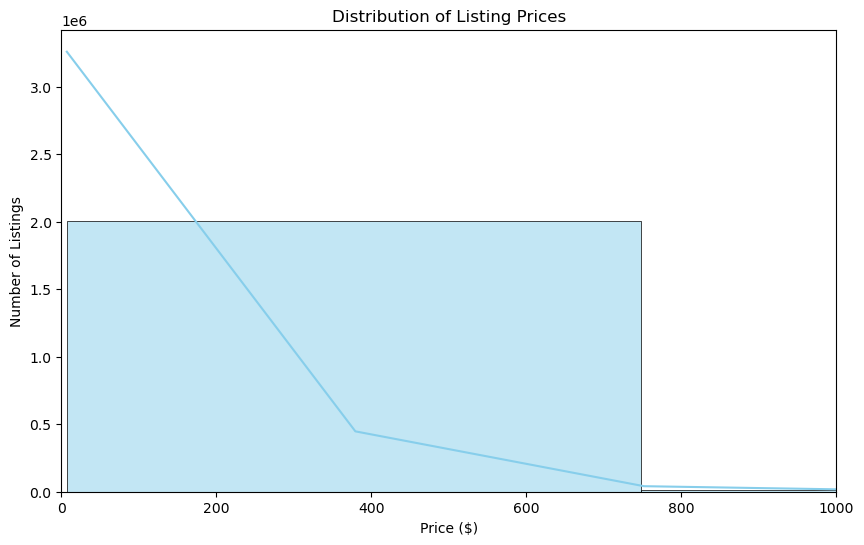

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(airbnb_data['price'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Listing Prices')
plt.ylabel('Number of Listings')
plt.xlabel('Price ($)')
plt.xlim(0,1000) # important for limiting extreme outliers
plt.show()

We comprehend typical price ranges and detect __outliers__, also airbnb prices often have extreme outliers, so we limit them in a range of 0 to 1000.

__Visual__:
* A histogram with 100 bins showing how listing prices are distributed
* KDE (Kernel Density Estimation) overlay - the smooth blue curve showing the probability density
* X-axis limited to 0-1000 to focus on the main price range and exclude extreme outliers

__Findings__:
* Highly right-skewed distribution -> most listings cluster at lower prices (left side)
* Peak concentration appears around 0-200 range with ~3 million listings
* Long tail extending toward higher prices, with very few listings above $700
* KDE curve smoothly represents this pattern, showing the distribution drops off rapidly as prices increase

#### __Price by Property Type__

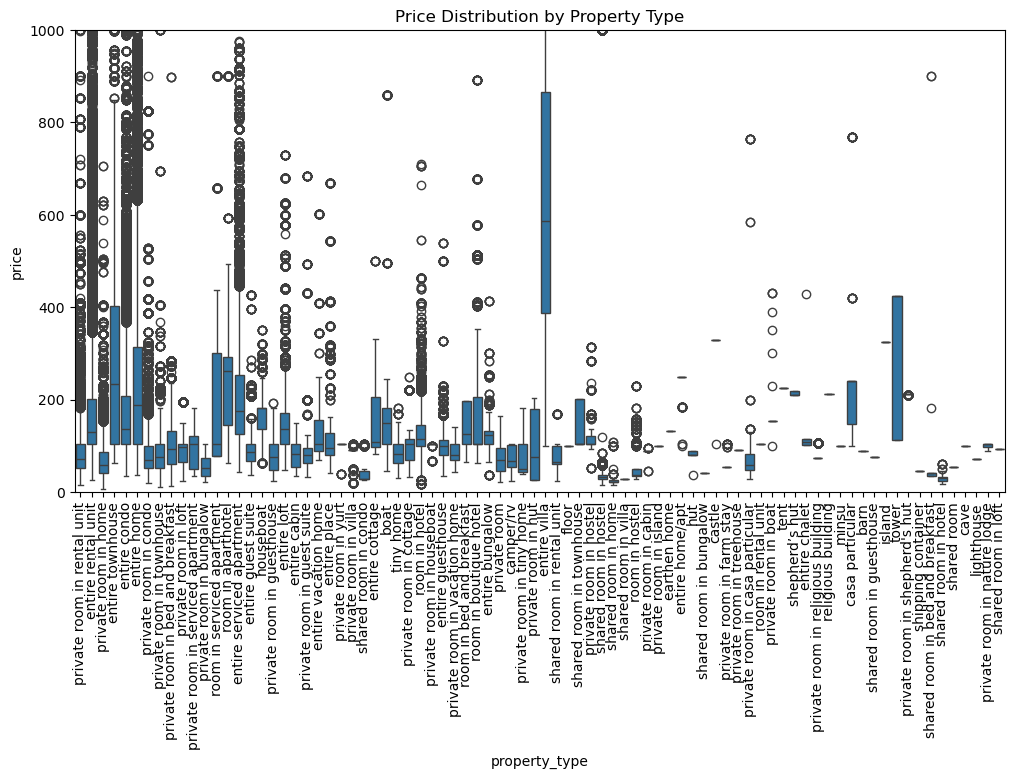

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=airbnb_data)
plt.xticks(rotation=90)
plt.ylim(0,1000)
plt.title('Price Distribution by Property Type')
plt.show()

Shows how different property types (Entire home, Private room, etc.) are priced.

__Visual__:
* Boxplots showing price distributions for each property type category
* X-axis labels rotated 90° for readability
* Y-axis limited to 0-1000 to focus on typical price ranges

__Findings__:

* Wide variety of property types - appears to be 30+ different categories (apartments, houses, etc.)
* Box components show: median (line in middle), interquartile range (box), whiskers (extending lines), and outliers (circles)
* Significant outliers - many property types have extreme high-price listings shown as scattered circles above the boxes
* Different median prices - some property types (like certain specialty accommodations) have higher typical prices than standard apartments
* Varying price ranges - some property types show tight price clustering, others show wide variation

#### __Review Length vs Rating__

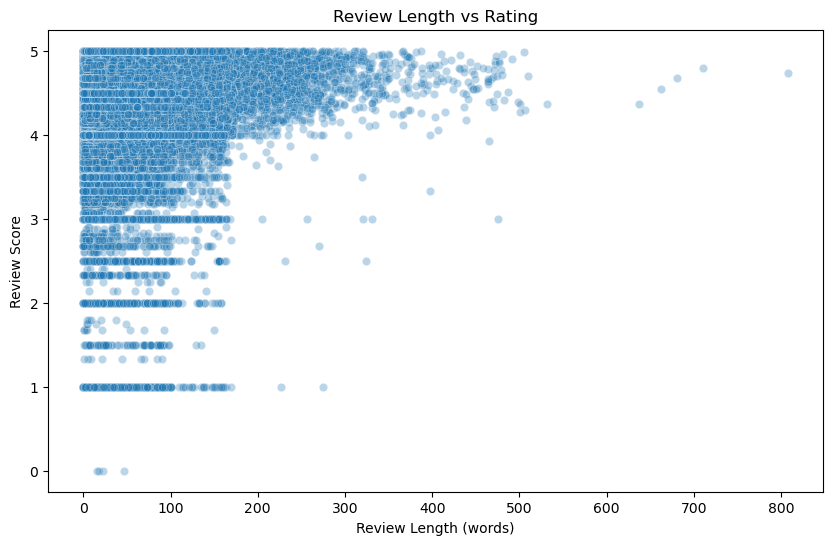

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='review_length', y='review_scores_rating', data=airbnb_data, alpha=0.3)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Review Score')
plt.show()

Check if longer reviews correlate with higher or lower ratings.

__Visual__:
* Each point represents one review
* X-axis: review length in words
* Y-axis: review score/rating (appears to be 0-5 scale)
* Alpha=0.3 makes points semi-transparent to show density/overlap

__Findings__:
* Massive concentration at short lengths - dense vertical bands of points clustered at very short review lengths (0-150 words)
* Horizontal striping - clear horizontal lines at integer rating values (1, 2, 3, 4, 5), suggesting discrete rating scale
* Positive reviews dominate - heaviest concentration at ratings 4-5, especially for shorter reviews
* Longer reviews spread out - as review length increases beyond ~200 words, points become more scattered with all rating levels represented
* Few very long reviews - reviews taper off significantly beyond 400-500 words

 Most reviews are short and positive (4-5 stars). People who write longer, more detailed reviews tend to have more varied opinions across the full rating spectrum. This suggests satisfied customers leave brief positive reviews, while those with complex experiences (good or bad) write more.

#### __Average Rating by Property Type__

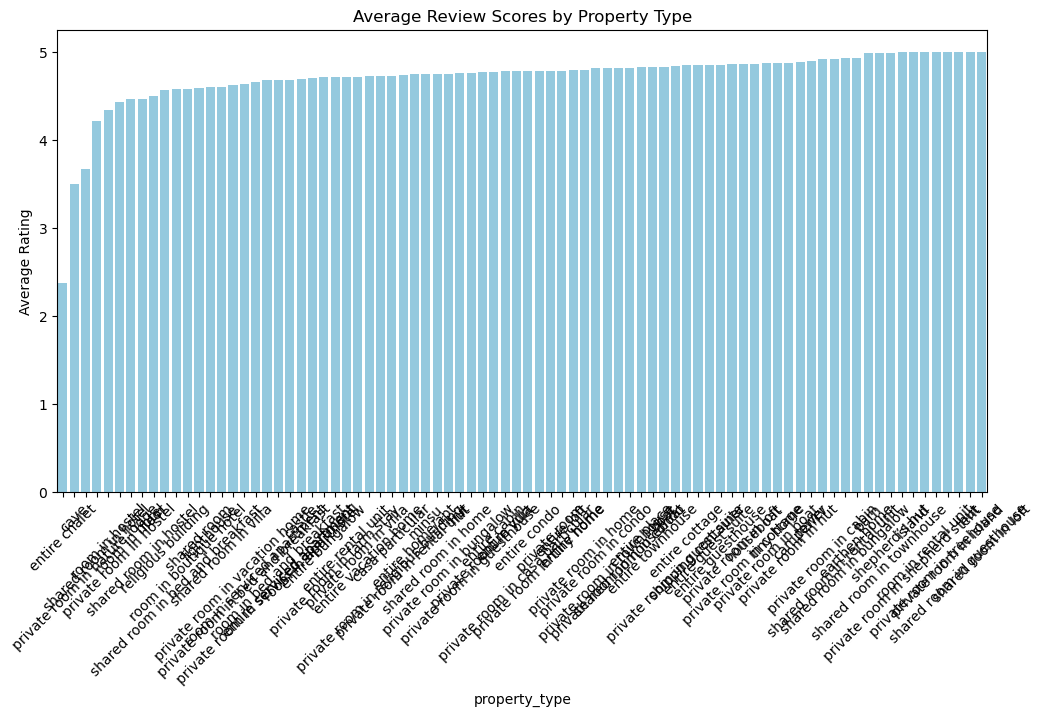

In [47]:
plt.figure(figsize=(12,6))
avg_rating = airbnb_data.groupby('property_type')['review_scores_rating'].mean().sort_values()
sns.barplot(x=avg_rating.index, y=avg_rating.values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.title("Average Review Scores by Property Type")
plt.show()

Compare guest satisfaction across different types of listings.

__Visual__:
* Bars representing average review score for each property type
* Property types sorted by their average rating (lowest to highest)
* X-axis labels rotated 45° for readability
* Y-axis shows average rating scale (0-5)

__Findings__:
* Consistently high ratings - almost all property types average between ~3.5 and 5.0 stars
* Gradual upward trend - ratings increase smoothly from left (lowest-rated) to right (highest-rated)
* Small variation overall - the difference between lowest and highest-rated property types is only about 1.5 points
* Most cluster around 4.5-5.0 - the majority of property types are rated very highly
* No major outliers - no property type is dramatically worse or better than others

This shows remarkably positive reviews across the board for Airbnb listings, with most property types averaging 4.5+ stars. The relatively flat distribution suggests guest satisfaction is consistently high regardless of accommodation type, though there are subtle differences with some specialty properties rating slightly lower than traditional apartments/homes.

#### __Correlation Heatmap__

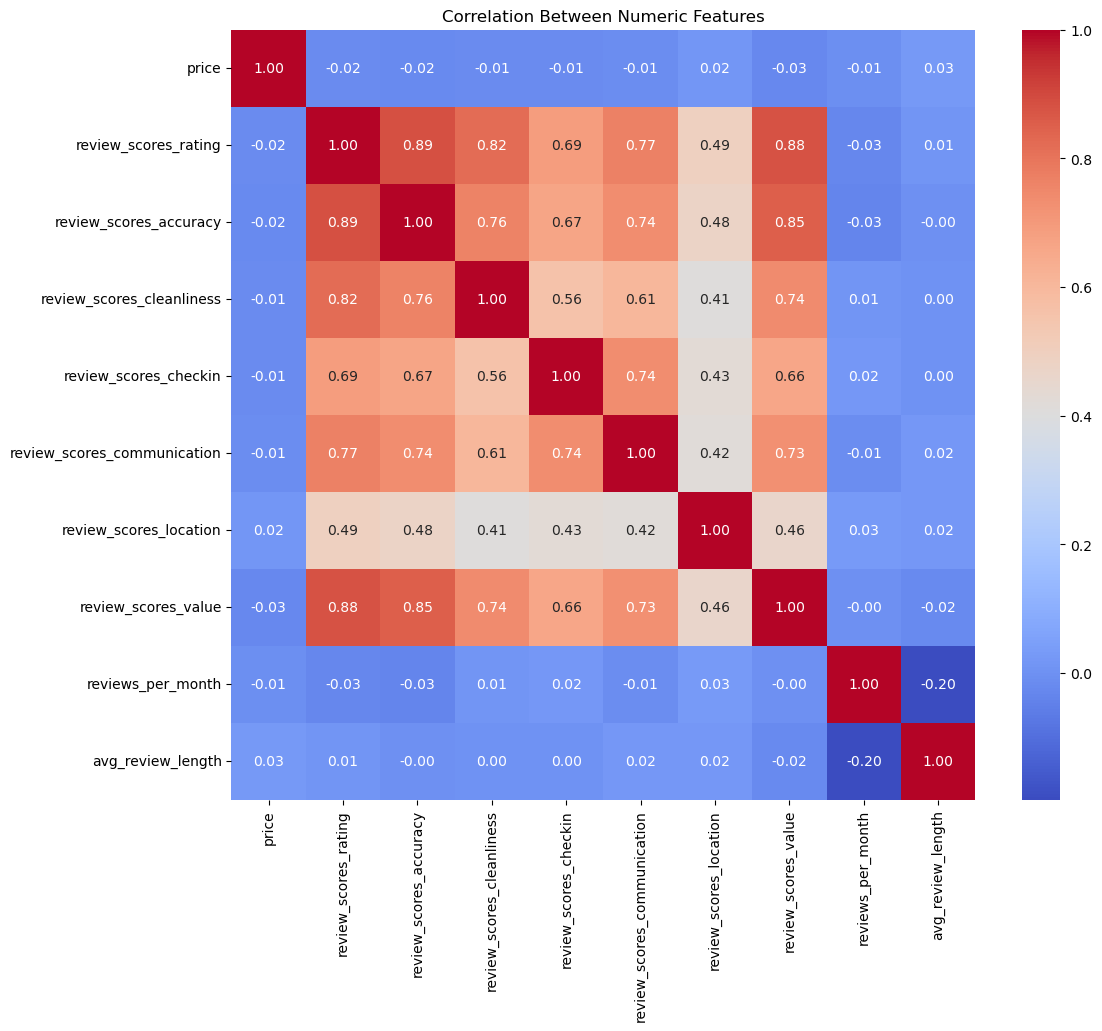

In [48]:
plt.figure(figsize=(12,10))
numeric_cols = ['price', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location',
                'review_scores_value', 'reviews_per_month', 'avg_review_length']
corr = airbnb_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

Observe which features are strongly correlated (price, reviews, ratings).

__Visual__:
* Correlation matrix with color-coded cells showing strength and direction of relationships
Values range from -1 to +1 (shown in each cell)
* Color scale: __dark red__ = strong positive correlation (+1), __dark blue__ = strong negative correlation (-1), white/light = weak/no correlation (0)

__Findings__:

* __Strong positive correlations__ (dark red, 0.7-0.9):
    * Review score metrics highly correlated with each other (rating, accuracy, cleanliness, check-in, communication, value)
    * These review dimensions tend to move together - properties rated high in one area are rated high in others
* __Weak correlations with price__ (light blue, near 0):
    * Price shows almost no relationship with any review scores or review frequency
    * Suggests expensive listings aren't necessarily better reviewed
* __Negative correlation__:
    * `reviews_per_month` and `avg_review_length` show -0.20 (light blue)
    * Properties with more frequent reviews tend to have shorter reviews

Review quality metrics are highly intercorrelated, forming a cluster of related measurements. However, price operates independently from guest satisfaction, indicating that higher prices don't guarantee better reviews or experiences.